# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [132]:
import pandas as pd
df = pd.read_csv('train.csv', index_col='ID')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.shape

(333, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [240]:
# Categorical data types
for col in ['chas', 'rad']:
    unique_vals = list(df[col].unique())
    print(col)
    print(unique_vals)
    print('--------\n')


chas
[0, 1]
--------

rad
[1, 2, 3, 5, 4, 8, 6, 7, 24]
--------



In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [133]:
cols = ['crim', 'nox', 'rm']
for col in cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    print('Statictics for ' + col + ' column')
    print('Mean: ' + str(mean_val))
    print('Standard deviation: ' + str(std_val))
    print('Median: ' + str(median_val))
    print('Mode: ' + str(mode_val))
    print('----\n')

Statictics for crim column
Mean: 3.360341471471471
Standard deviation: 7.352271836781107
Median: 0.26169000000000003
Mode: 0.01501
----

Statictics for nox column
Mean: 0.5571441441441441
Standard deviation: 0.11495450830289293
Median: 0.5379999999999999
Mode: 0.5379999999999999
----

Statictics for rm column
Mean: 6.2656186186186185
Standard deviation: 0.7039515757334478
Median: 6.202000000000001
Mode: 6.127000000000002
----



In [238]:
# I wanted to explore the relation between 'crim', 'chas' and 'rad' as 'chas' and 'rad' are
# categorical data types.
def compare_stats(column_name):
    for c in df['chas'].unique():
        print('Chas: '+ str(c))
        mean_value = df.loc[
                df['chas'] == c
                , column_name].mean()
        print('Mean: ' + str(mean_value), '\n')


    for r in df['rad'].unique():
        print('Rad: '+ str(r))
        mean_value = df.loc[
                df['rad'] == r
                , column_name].mean()
        print('Mean: ' + str(mean_value), '\n')


    for r in df['rad'].unique():
        for c in df['chas'].unique():
            print('Rad: ' + str(r) + ' - ' + 'Chas: '+ str(c) )
            mean_value = df.loc[
                (df['rad'] == r)
                &
                (df['chas'] == c)
                , column_name].mean()
            print('Mean: ' + str(mean_value), '\n')

compare_stats('crim')

Chas: 0
Mean: 3.436786773162939 

Chas: 1
Mean: 2.1639725 

Rad: 1
Mean: 0.027164999999999998 

Rad: 2
Mean: 0.09073714285714286 

Rad: 3
Mean: 0.09687074074074076 

Rad: 5
Mean: 0.6963392105263158 

Rad: 4
Mean: 0.4092207142857144 

Rad: 8
Mean: 0.3927338888888889 

Rad: 6
Mean: 0.13924846153846154 

Rad: 7
Mean: 0.15672 

Rad: 24
Mean: 11.616403863636362 

Rad: 1 - Chas: 0
Mean: 0.028099999999999997 

Rad: 1 - Chas: 1
Mean: 0.01501 

Rad: 2 - Chas: 0
Mean: 0.09073714285714286 

Rad: 2 - Chas: 1
Mean: nan 

Rad: 3 - Chas: 0
Mean: 0.09206269230769232 

Rad: 3 - Chas: 1
Mean: 0.22188 

Rad: 5 - Chas: 0
Mean: 0.6469644285714286 

Rad: 5 - Chas: 1
Mean: 1.2723783333333334 

Rad: 4 - Chas: 0
Mean: 0.4190650746268657 

Rad: 4 - Chas: 1
Mean: 0.18936333333333333 

Rad: 8 - Chas: 0
Mean: 0.36210357142857147 

Rad: 8 - Chas: 1
Mean: 0.49994000000000005 

Rad: 6 - Chas: 0
Mean: 0.13924846153846154 

Rad: 6 - Chas: 1
Mean: nan 

Rad: 7 - Chas: 0
Mean: 0.15672 

Rad: 7 - Chas: 1
Mean: nan 

Rad: 

In [51]:
# Finding poteantial 'crim' outliers
IQR_multiplier = 1.5
q75 = df['crim'].quantile(0.75)
q25 = df['crim'].quantile(0.25)
IQR = q75 - q25
lower_limit = q25 - (IQR_multiplier*IQR)
upper_limit = q75 + (IQR_multiplier*IQR)

crim_outliers = df.loc[
    (df['crim'] > upper_limit)
    |
    (df['crim'] < lower_limit)
, :]
    
crim_outliers                                

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
368,13.52220,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
372,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
374,11.10810,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
375,18.49820,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
377,15.28800,0.0,18.1,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,13.9
378,9.82349,0.0,18.1,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24,13.3
383,9.18702,0.0,18.1,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60,11.3
385,20.08490,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
387,24.39380,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5


In [53]:
# Correlation matrix chart

df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251
tax,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078


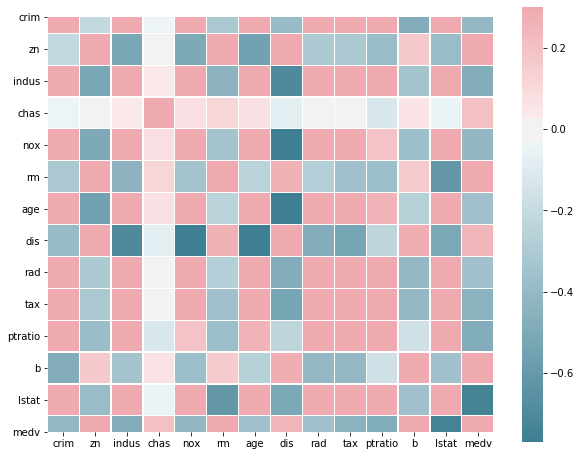

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.2, ax=ax)

plt.show()

In [190]:
import seaborn as sns

plt.style.use('ggplot')

df['rad'] = df['rad'].astype('category')

def plot_scatter(df, x_axis, y_axis):
    g = sns.FacetGrid(df, col="rad", hue="chas",col_wrap=3)
    g.map(plt.scatter, x_axis, y_axis, alpha=.7, edgecolor='white', s=120, lw=0.3)
    g.add_legend()
    plt.show()

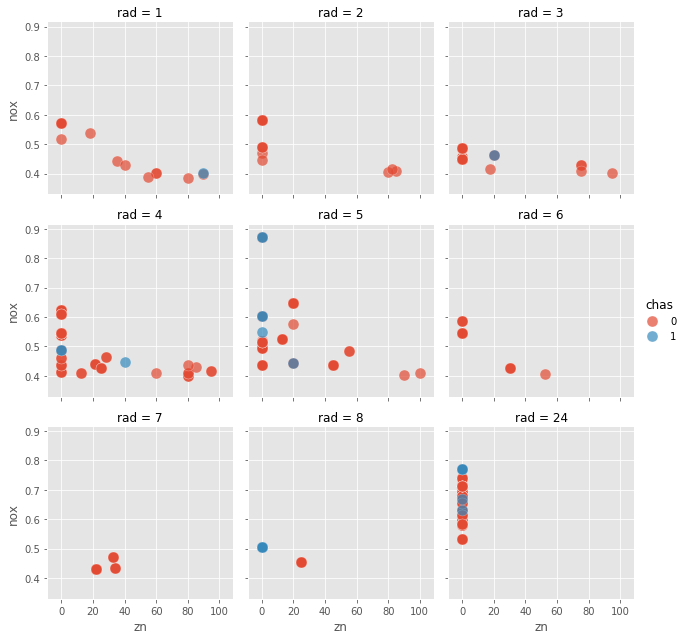

In [191]:
x_axis = 'zn'
y_axis = 'nox'
plot_scatter(df, x_axis, y_axis)


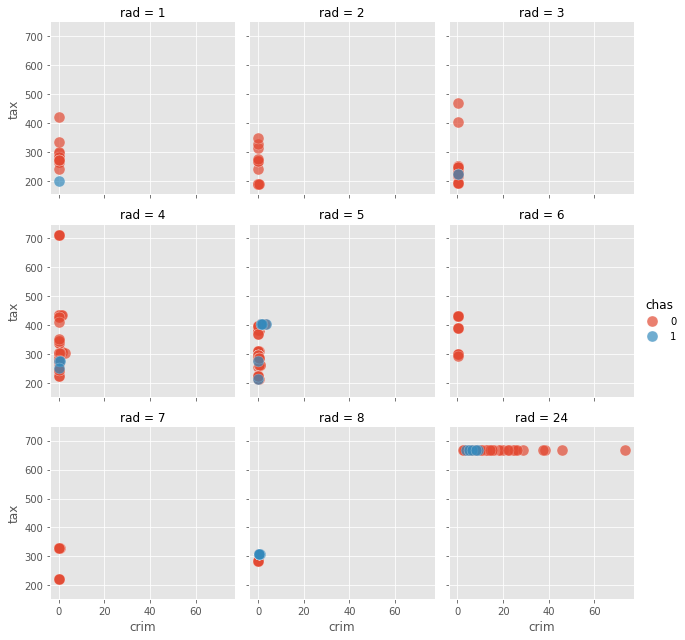

In [192]:
x_axis = 'crim'
y_axis = 'tax'
plot_scatter(df, x_axis, y_axis)

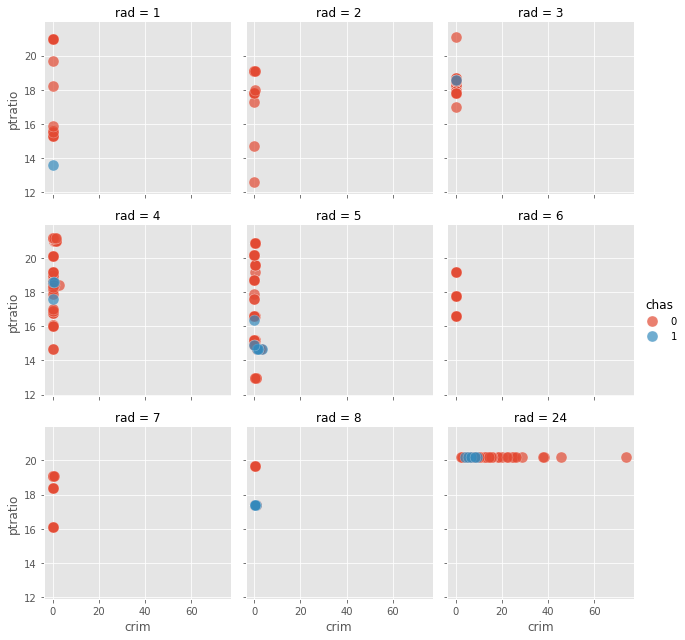

In [193]:
x_axis = 'crim'
y_axis = 'ptratio'

plot_scatter(df, x_axis, y_axis)

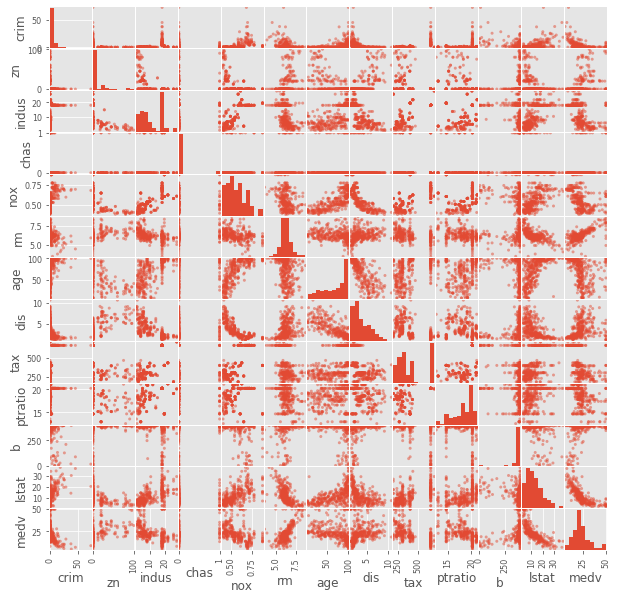

In [220]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

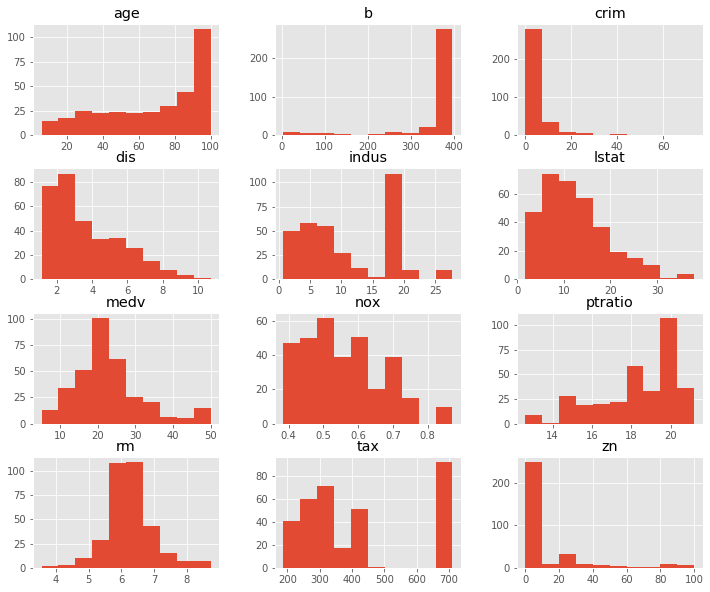

In [237]:
df.hist(column=['crim', 'age', 'nox', 'zn', 'indus', 'rm', 'tax', 'ptratio', 'dis', 'b','lstat', 'medv'], figsize=(12,10))
plt.show()

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!